In [1]:
import os
import numpy as np
from skimage import transform
from skimage.data import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# sns.set(color_codes=True)
import random
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getdata(folder_path):
    dirs = [i for i in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path,i))]

    images = []
    labels = []
    for d in dirs:
        
        sub_dir_path = os.path.join(folder_path, d)
        imagePath_list = [ os.path.join(sub_dir_path, f) for f in os.listdir(sub_dir_path) if f.endswith('.ppm') ]
        
        for img in imagePath_list:
            images.append(imread(img))
            labels.append(int(d))
    return np.array(images), np.array(labels)
    
training_path = '/home/d/Kaggle/Belgian_Traffic/BelgiumTSC_Training/Training'
test_path = '/home/d/Kaggle/Belgian_Traffic/BelgiumTSC_Testing/Testing'

train_images, train_y = getdata(training_path)
test_images, test_y = getdata(test_path)

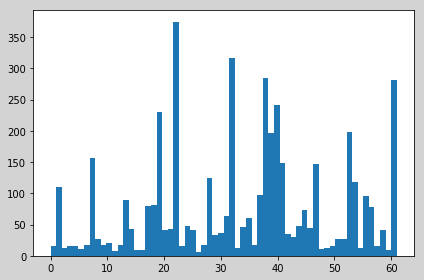

In [3]:
# Make a histogram with 62 bins of the `labels` data

plt.figure().patch.set_facecolor('lightgrey')
# sns.distplot(train_y, bins=62)
plt.hist(train_y, 62)
plt.tight_layout()

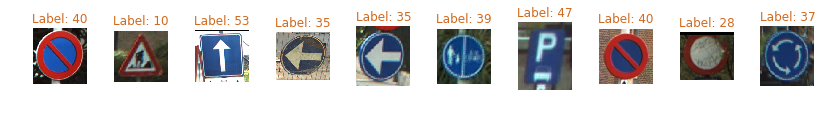

In [4]:
rand = np.random.RandomState(12)
x = rand.randint(4000, size=10)
# Initialize the figure
plt.figure(figsize=(14,2))
for i in range(len(x)):
    plt.subplot(1, len(x), i+1)
    plt.axis('off')
    plt.imshow(train_images[x[i]])
    plt.title("Label: {0}".format(train_y[x[i]]), color='chocolate')
    plt.subplots_adjust(wspace=0.5)

plt.show()

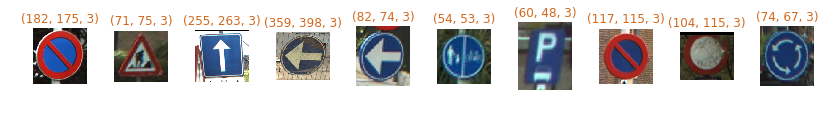

In [5]:
plt.figure(figsize=(14,2))
for i in range(len(x)):
    plt.subplot(1, len(x), i+1)
    plt.axis('off')
    plt.imshow(train_images[x[i]])
    plt.title("{0}".format(train_images[x[i]].shape), color='chocolate')
    plt.subplots_adjust(wspace=0.5)

plt.show()

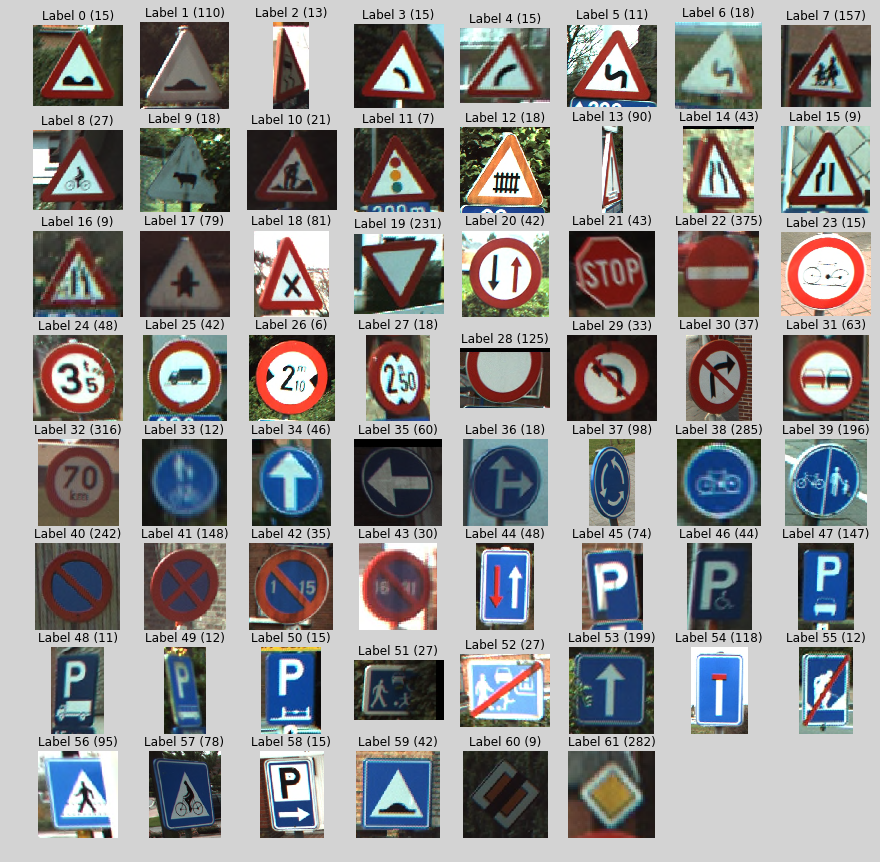

In [6]:
train_y_list = train_y.tolist()         #important step to convert train_y array into a list
unique_labels = list(set(train_y_list))
plt.figure(figsize=(15, 15)).patch.set_facecolor('lightgrey')
i=1
for label in unique_labels:
    image = train_images[train_y_list.index(label)]
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format( label, train_y_list.count(label) ))
    i+=1
    plt.imshow(image)
plt.show()

In [7]:
# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in train_images]  # Why does it change min & max pixel values??

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(4575, 28, 28, 3)


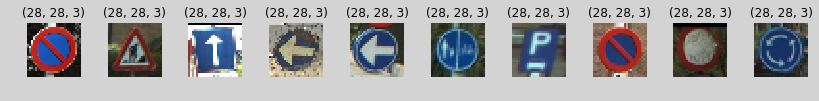

In [8]:
print(np.array(images28).shape)

plt.figure(figsize=(14,2)).patch.set_facecolor('lightgray')
for i in range(len(x)):
    plt.subplot(1, len(x), i+1)
    plt.axis('off')
    plt.imshow(images28[x[i]])
    plt.title("{0}".format(images28[x[i]].shape))
    plt.subplots_adjust(wspace=0.5)

plt.show()

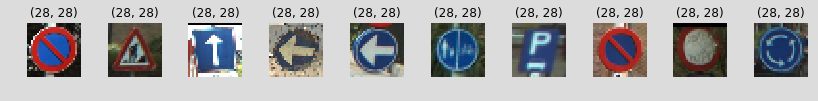

In [9]:
images28_arr = np.array(images28) # necessary to convert into numpy array otherwise rgb2gray() won't work

images28_gray = rgb2gray(images28_arr)

plt.figure(figsize=(14,2)).patch.set_facecolor('gainsboro')
for i in range(len(x)):
    plt.subplot(1, len(x), i+1)
    plt.axis('off')
    plt.imshow(images28[x[i]], cmap='gray')
    plt.title("{0}".format(images28_gray[x[i]].shape))
    plt.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [11]:
sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range(201):
    print('EPOCH ', i)
    
    _, accuracy_val = sess.run( [train_op, accuracy], feed_dict = { x:images28_gray, y:train_y } )
    if i%10 == 0:
        print('Loss: ', loss)
    print('DONE WITH EPOCH')

EPOCH  0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH  1
DONE WITH EPOCH
EPOCH  2
DONE WITH EPOCH
EPOCH  3
DONE WITH EPOCH
EPOCH  4
DONE WITH EPOCH
EPOCH  5
DONE WITH EPOCH
EPOCH  6
DONE WITH EPOCH
EPOCH  7
DONE WITH EPOCH
EPOCH  8
DONE WITH EPOCH
EPOCH  9
DONE WITH EPOCH
EPOCH  10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH  11
DONE WITH EPOCH
EPOCH  12
DONE WITH EPOCH
EPOCH  13
DONE WITH EPOCH
EPOCH  14
DONE WITH EPOCH
EPOCH  15
DONE WITH EPOCH
EPOCH  16
DONE WITH EPOCH
EPOCH  17
DONE WITH EPOCH
EPOCH  18
DONE WITH EPOCH
EPOCH  19
DONE WITH EPOCH
EPOCH  20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH  21
DONE WITH EPOCH
EPOCH  22
DONE WITH EPOCH
EPOCH  23
DONE WITH EPOCH
EPOCH  24
DONE WITH EPOCH
EPOCH  25
DONE WITH EPOCH
EPOCH  26
DONE WITH EPOCH
EPOCH  27
DONE WITH EPOCH
EPOCH  28
DONE WITH EPOCH
EPOCH  29
DONE WITH EPOCH
EPOCH  30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH  3

In [12]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images28_gray)), 10)
sample_images = [images28_gray[i] for i in sample_indexes]
sample_labels = [train_y[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[38, 1, 54, 61, 40, 31, 34, 61, 38, 17]
[38 22 54 61 40 32 39 40 38 17]


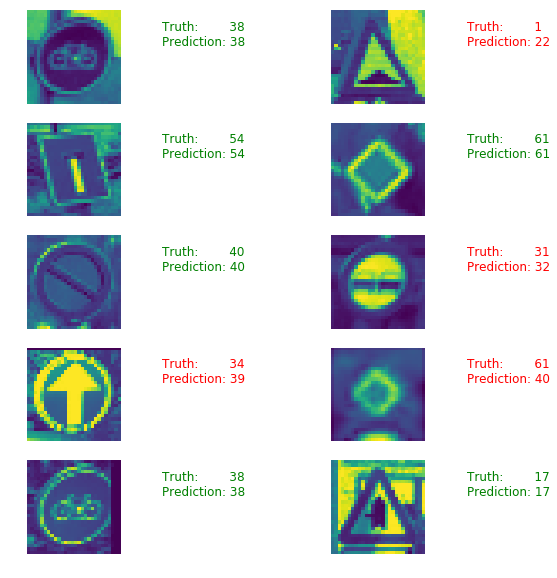

In [13]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [14]:

# Load the test data
test_images, test_labels = getdata(test_path)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.610


In [15]:
sess.close()